In [2]:
import os
print(os.listdir("../input/chest-xray-pneumonia/chest_xray/train"))
TRAIN_PATH = "../input/chest-xray-pneumonia/chest_xray/train/"

['NORMAL', 'PNEUMONIA']


Using TensorFlow backend.


PNUEMONIA


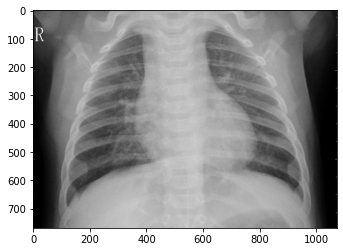

In [3]:
from keras.preprocessing.image import load_img
img_name = 'person1000_virus_1681.jpeg'
img_normal = load_img(TRAIN_PATH+"PNEUMONIA/" + img_name)
import matplotlib.pyplot as plt
print('PNUEMONIA')
plt.imshow(img_normal)
plt.show()

In [5]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
# Initialising the CNN
classifier = Sequential()
     # Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (226,226, 3), activation = 'relu')) #3 is no of channels ,64 is dim of 2d array in each channel
     #32 is fliters(feature detector), 3,3 is row and col of feature detector
     # Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2))) 
    # Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu')) #already know size, already have so no need I/P
classifier.add(MaxPooling2D(pool_size = (2, 2)))
    # Step 3 - Flattening
classifier.add(Flatten())
    # Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
    # Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, #add new images ,best performance reduce overfitting
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, #add new images ,best performance reduce overfitting
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory("../input/chest-xray-pneumonia/chest_xray/train",
                                                 target_size = (226,226), #T_S HIGH MORE ACC BECAUSE get more info(lot of pixels)
                                                 batch_size = 128,
                                                 class_mode = 'binary')

val_set = val_datagen.flow_from_directory("../input/chest-xray-pneumonia/chest_xray/val/",
                                                 target_size = (226,226), #T_S HIGH MORE ACC BECAUSE get more info(lot of pixels)
                                                 batch_size = 128,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory("../input/chest-xray-pneumonia/chest_xray/test/",
                                            target_size = (226,226),
                                            batch_size = 128,
                                            class_mode = 'binary')

history=classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 1,
                         validation_data = val_set,
                         validation_steps = 2000)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/1
 949/8000 [==>...........................] - ETA: 6:40:08 - loss: 0.2232 - accuracy: 0.9194

/opt/conda/lib/python3.6/site-packages/keras/utils/data_utils.py:616: UserWarning: The input 11 could not be retrieved. It could be because a worker has died.
  UserWarning)


1170/8000 [===>..........................] - ETA: 6:33:16 - loss: 0.2064 - accuracy: 0.9253

KeyboardInterrupt: 